Problem Definition : This database contains 14 attributes . In particular, the Cleveland database is the only one 
that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. 
It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting 
to distinguish presence (values 1,2,3,4) from absence (value 0).
Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
#load data set from github
df = pd.read_csv('heartdisease_data.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
#ca column having no value so we can drop
df.drop('ca', axis=1,inplace=True)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,6.0,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,0
199,62,1,2,120.0,254.0,0.0,2,93.0,1.0,0.0,NaN,NaN,1


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg       int64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
thal        float64
num           int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  144 non-null    float64
 4   chol      193 non-null    float64
 5   fbs       193 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   147 non-null    float64
 8   exang     147 non-null    float64
 9   oldpeak   144 non-null    float64
 10  slope     98 non-null     float64
 11  thal      34 non-null     float64
 12  num       200 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 20.4 KB


In [9]:
df.shape

(200, 13)

In [10]:
#replace NaN value with 0
df.replace(np.nan ,0, inplace=True)

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,0.0,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,0.0,0.0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,0.0,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,0.0,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,0.0,0


In [12]:
#Summary Stastics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,96.310000,172.490000,0.340000,0.735000,90.25500,0.475000,0.951000,1.045000,1.070000,1.520000
std,7.811697,0.171015,0.795701,62.917781,116.752497,0.474898,0.683455,57.50237,0.500628,1.110344,1.166093,2.427874,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.500000,0.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,123.000000,214.000000,0.000000,1.000000,111.50000,0.000000,0.500000,0.000000,0.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.00000,1.000000,2.000000,2.000000,0.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.00000,1.000000,4.000000,3.000000,7.000000,4.000000


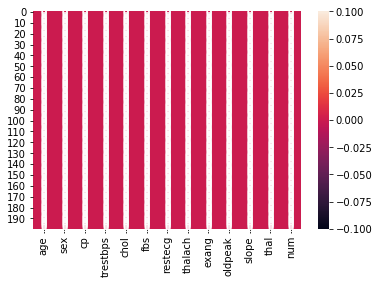

In [13]:
#data Visualization
#to check missing values
sns.heatmap(df.isnull(), annot=True)
plt.show()

In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [15]:
df_corr = df.corr()
print(df_corr.head())

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000  0.034230 -0.038280  0.039836  0.049923  0.135728   
sex       0.034230  1.000000  0.038036 -0.038828 -0.101693 -0.059400   
cp       -0.038280  0.038036  1.000000  0.226815  0.048981 -0.044416   
trestbps  0.039836 -0.038828  0.226815  1.000000  0.003277 -0.010777   
chol      0.049923 -0.101693  0.048981  0.003277  1.000000  0.156311   

           restecg   thalach     exang   oldpeak     slope      thal       num  
age       0.002400 -0.056605  0.106330  0.134659  0.092595 -0.048196  0.287289  
sex       0.060621 -0.037544 -0.008804  0.058379  0.032002 -0.091739  0.147470  
cp        0.034790  0.172127  0.277842  0.186268  0.213681  0.140282  0.168210  
trestbps -0.002053  0.875749  0.577448  0.480473  0.487198  0.210492  0.085980  
chol      0.002391 -0.089120  0.034514 -0.060076 -0.059847 -0.068196  0.058451  


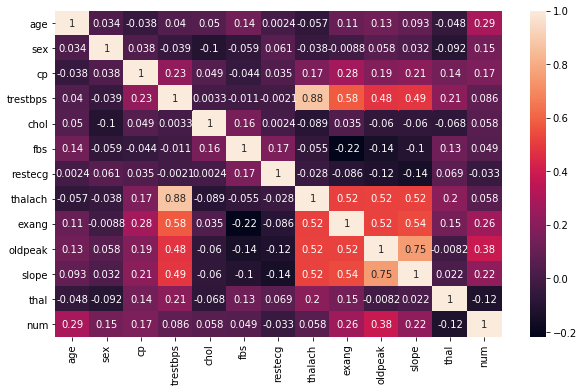

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df_corr,annot=True)

In [17]:
#Plotting outliers using plot.box
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

Univariate and Bivariate Analysis

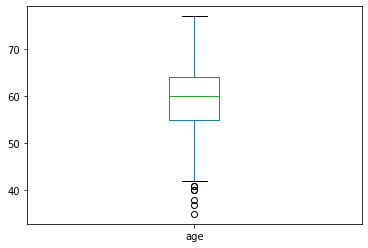

In [18]:
df['age'].plot.box()

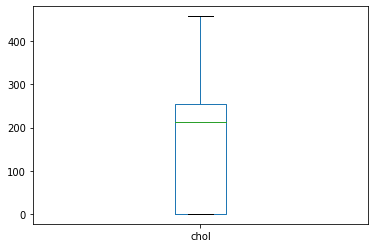

In [19]:
df['chol'].plot.box()

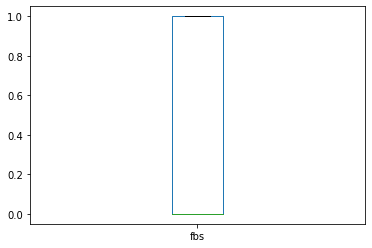

In [20]:
df['fbs'].plot.box()

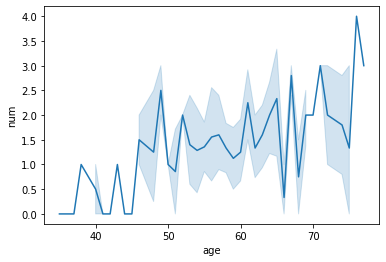

In [21]:
sns.lineplot(x='age', y='num' ,data=df)

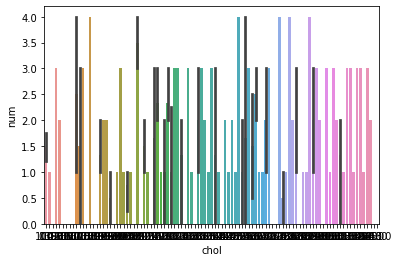

In [22]:
sns.barplot(x='chol', y='num' ,data=df)

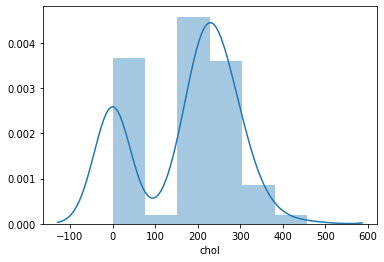

In [23]:
sns.distplot(df['chol'])

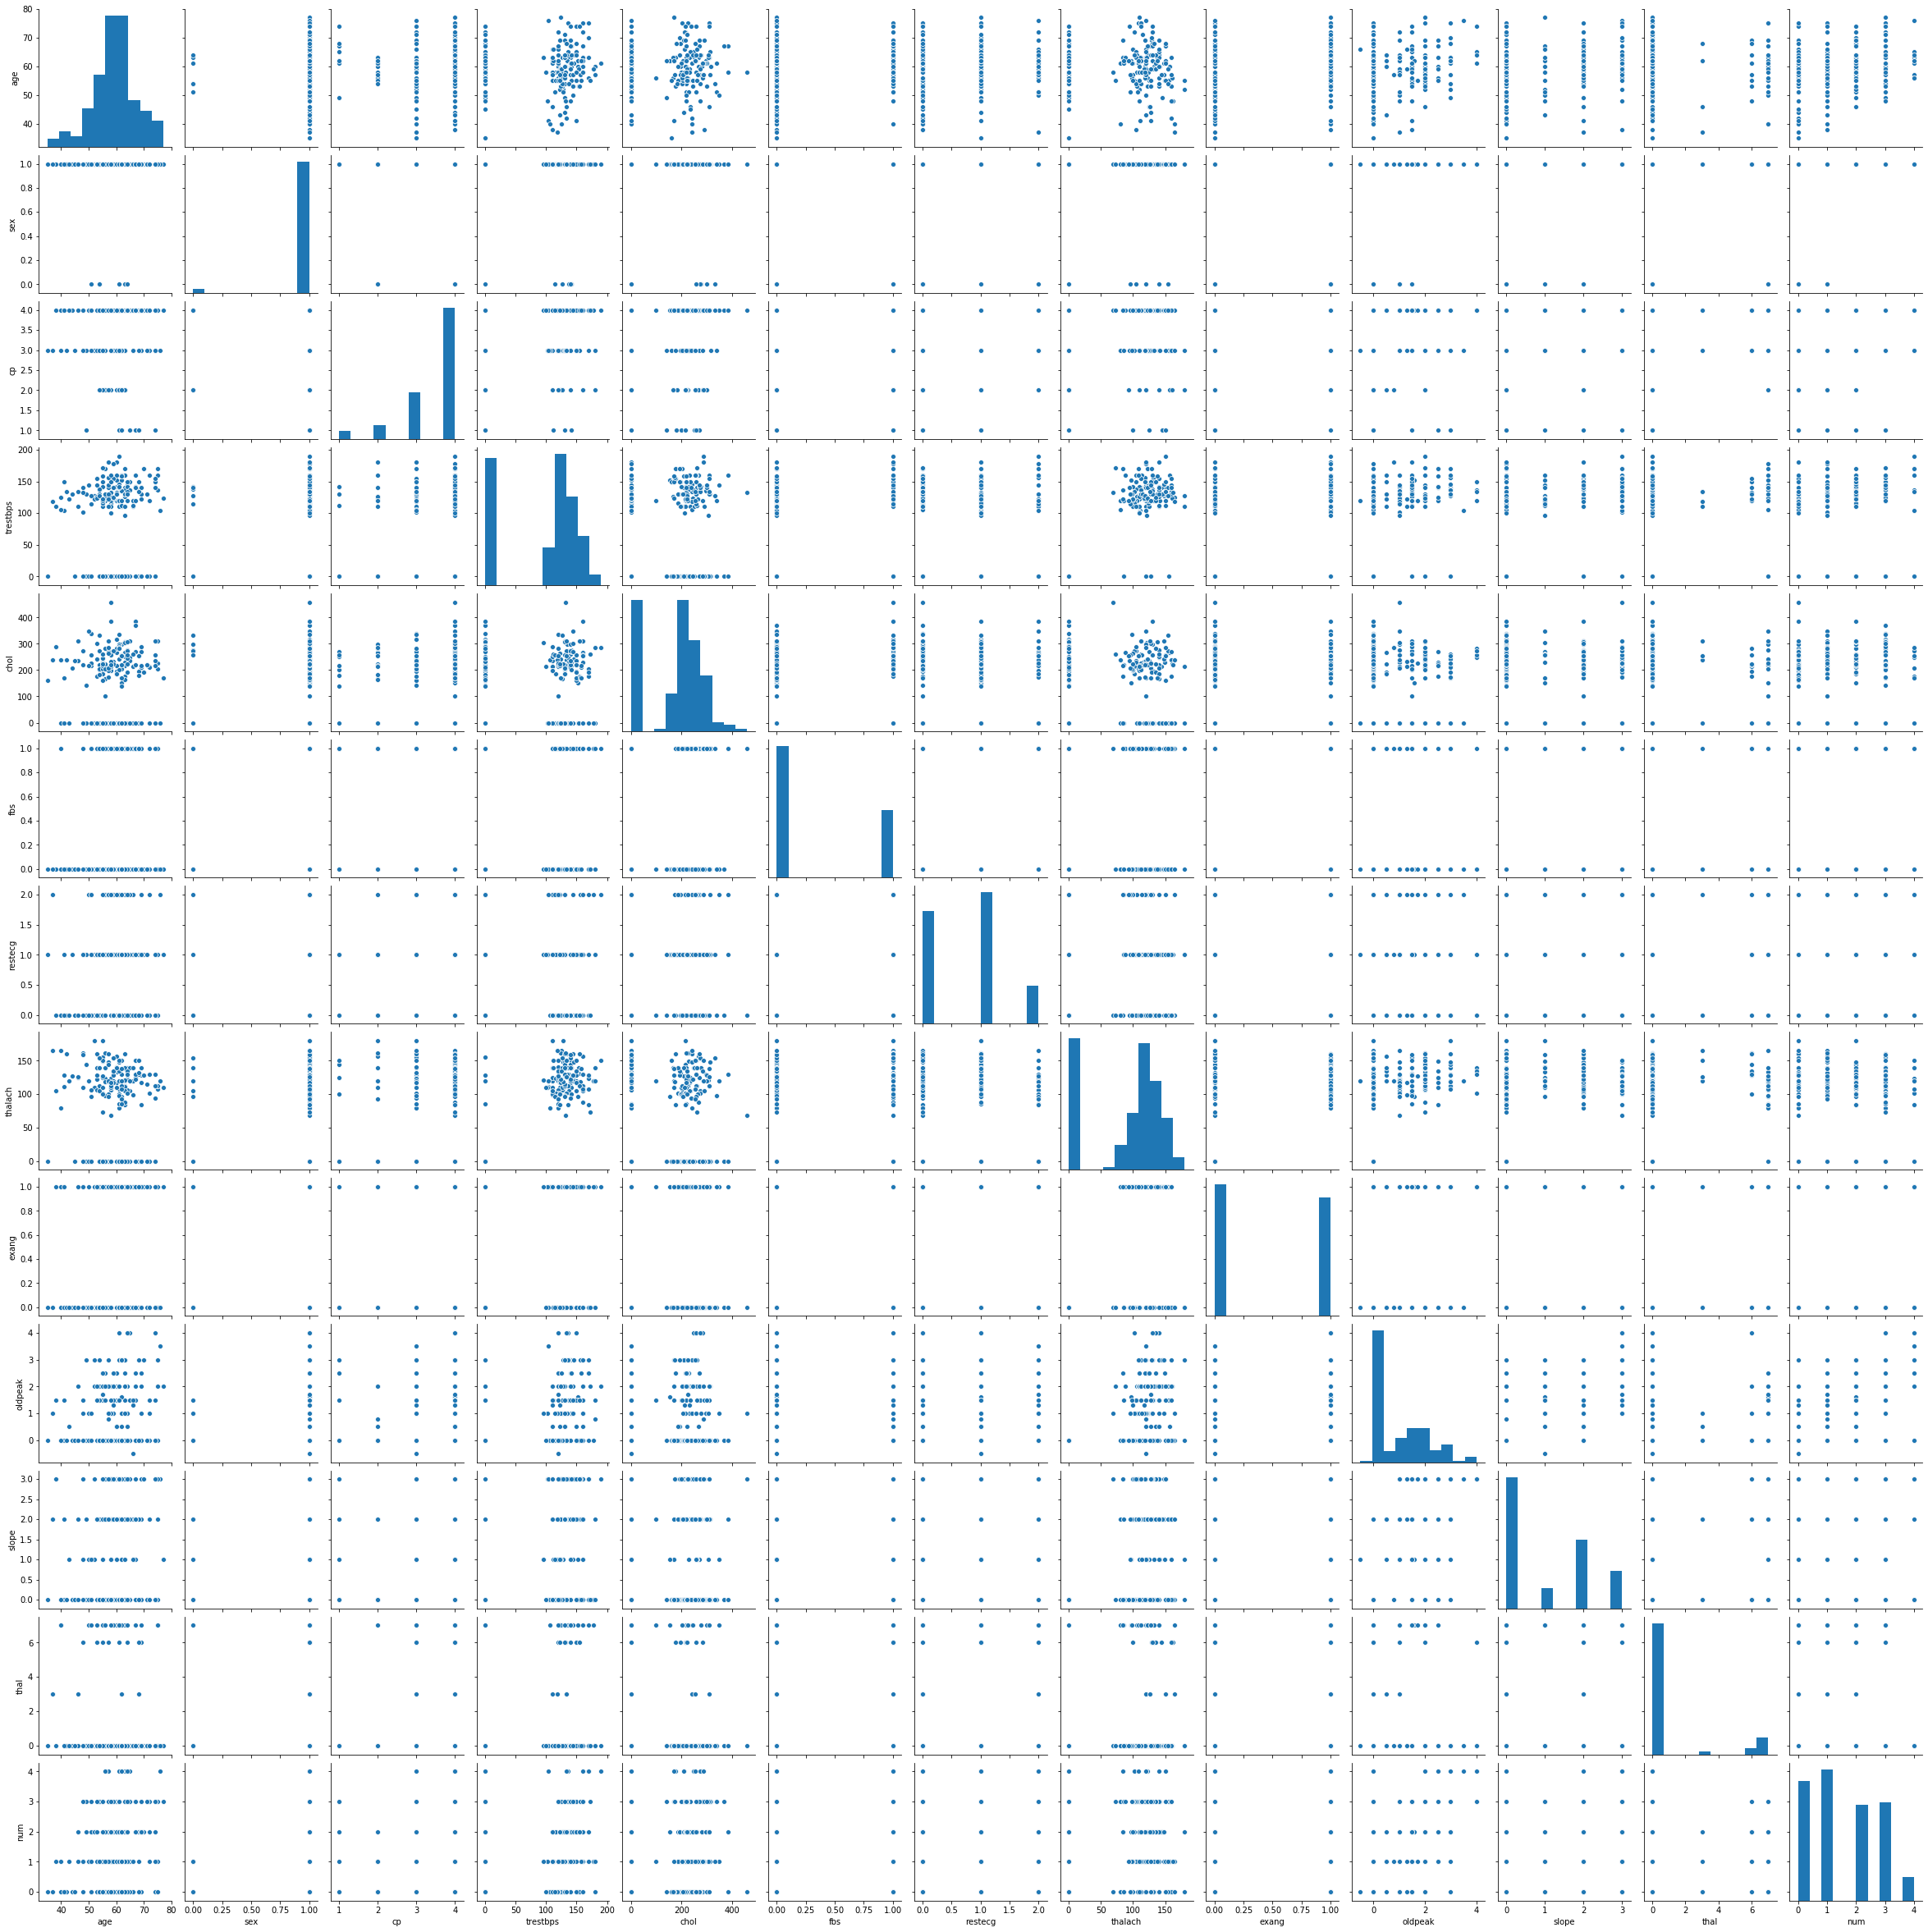

In [24]:
sns.pairplot(df)

In [25]:
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -0.750363
chol       -0.469975
fbs         0.680636
restecg     0.391463
thalach    -0.715818
exang       0.100883
oldpeak     0.823429
slope       0.468819
thal        1.905183
num         0.297393
dtype: float64

In [26]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [27]:
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -0.750363
chol       -0.469975
fbs         0.680636
restecg     0.391463
thalach    -0.715818
exang       0.100883
oldpeak     0.314899
slope       0.468819
thal        1.819829
num         0.297393
dtype: float64

In [28]:
#removing outliers
from scipy.stats import zscore
z =abs(zscore(df))
print(df.shape)
df_fin = df.loc[(z<3).all(axis=1)]
print(df_fin.shape)

(200, 13)
(185, 13)


In [29]:
#split data into x and y
df_x = df_fin.drop(columns=['num'])
y = df_fin[['num']]

In [30]:
from sklearn import preprocessing 
sc = preprocessing.StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x,columns=df_x.columns)

In [31]:
x.skew()

age        -0.316167
sex         0.000000
cp         -1.368017
trestbps   -0.786518
chol       -0.423831
fbs         0.730312
restecg     0.377921
thalach    -0.760317
exang       0.032702
oldpeak     0.282184
slope       0.431251
thal        1.795525
dtype: float64

In [32]:
#Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve , auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [33]:
def max_acc_score(regr, df_x, y):
    max_acc_score= 0 
    for i in range(42,101):
        r_state = i
        train_x,test_x, train_y,test_y = train_test_split(x,y, random_state = r_state, test_size=0.20)
        regr.fit(train_x,train_y)
        pred = regr.predict(test_x)
        acc_score = accuracy_score(pred, test_y)
        print("The accuraccy score for : ",r_state , "is : ", acc_score)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_r_state = r_state
    print("max accuracy score coreesponding to ",final_r_state," is ",max_acc_score)
    return final_r_state

In [34]:
#test Logistic Regression model
from sklearn.linear_model import LogisticRegression 
lg = LogisticRegression()
r_state = max_acc_score(lg, x, y)

The accuraccy score for :  42 is :  0.24324324324324326
The accuraccy score for :  43 is :  0.2702702702702703
The accuraccy score for :  44 is :  0.2972972972972973
The accuraccy score for :  45 is :  0.21621621621621623
The accuraccy score for :  46 is :  0.32432432432432434
The accuraccy score for :  47 is :  0.32432432432432434
The accuraccy score for :  48 is :  0.24324324324324326
The accuraccy score for :  49 is :  0.21621621621621623
The accuraccy score for :  50 is :  0.13513513513513514
The accuraccy score for :  51 is :  0.2702702702702703
The accuraccy score for :  52 is :  0.35135135135135137
The accuraccy score for :  53 is :  0.32432432432432434
The accuraccy score for :  54 is :  0.32432432432432434
The accuraccy score for :  55 is :  0.24324324324324326
The accuraccy score for :  56 is :  0.32432432432432434
The accuraccy score for :  57 is :  0.3783783783783784
The accuraccy score for :  58 is :  0.2702702702702703
The accuraccy score for :  59 is :  0.351351351351351

In [35]:
train_x,test_x, train_y,test_y = train_test_split(x,y, random_state = 62, test_size=0.20)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(148, 12)
(37, 12)
(148, 1)
(37, 1)


In [36]:
#Using GridSearchCV to select best parameter
from sklearn.model_selection import GridSearchCV
lg = LogisticRegression()
parameters = {'penalty':['l1','l2']}
gd= GridSearchCV(lg,parameters)
gd.fit(train_x, train_y)
gd.best_params_

{'penalty': 'l2'}

In [37]:
#Using SVC
sv = SVC()
parameters = {'kernel':('linear','rbf','poly'),'C':[1,10]}
gd= GridSearchCV(sv,parameters)
gd.fit(train_x, train_y)
gd.best_params_

{'C': 1, 'kernel': 'rbf'}

In [38]:
#best for KNN
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[1,10]}
gd= GridSearchCV(knn,parameters)
gd.fit(train_x, train_y)
gd.best_params_

{'n_neighbors': 10}

In [39]:
#best for Decision Tree
dtc = DecisionTreeClassifier()
parameters = {'criterion':('gini','entropy')}
gd= GridSearchCV(dtc,parameters)
gd.fit(train_x, train_y)
gd.best_params_

{'criterion': 'entropy'}

In [41]:
#Tessting all required model with best parameter calculated
model= []
score=[]
cvs=[]

for i in [LogisticRegression(penalty='l2'),SVC(C=1 , kernel='rbf'),KNeighborsClassifier(n_neighbors=10),
          DecisionTreeClassifier(criterion='entropy')]:
    k=i
    model.append(i)
    print("\n")
    print("The model calculations for ",i , "are:")
    k.fit(train_x,train_y)
    k.score(train_x,train_y)
    predict= k.predict(test_x)
    print(predict)
    AS = accuracy_score(predict, test_y)
    print("Accuracy score ",AS)
    score.append(AS)
    cv_score = cross_val_score(k,x,y,cv=5, scoring="accuracy").mean()
    print("The CV score is ", cv_score)
    cvs.append(cv_score)
    print("")
    cm = confusion_matrix(predict, test_y)
    print(cm)
    print("")
    print(classification_report(predict, test_y))
    print("\n")



The model calculations for  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) are:
[1 0 3 1 0 1 3 0 3 0 0 2 4 2 2 2 1 0 1 3 3 0 2 3 1 0 0 2 1 2 1 1 1 0 0 1 3]
Accuracy score  0.43243243243243246
The CV score is  0.33513513513513515

[[6 3 1 1 0]
 [4 5 0 2 0]
 [1 2 2 2 0]
 [0 2 2 3 0]
 [1 0 0 0 0]]

              precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           1       0.42      0.45      0.43        11
           2       0.40      0.29      0.33         7
           3       0.38      0.43      0.40         7
           4       0.00      0.00      0.00         1

    accuracy                           0.43        37
   macro avg       0.34      0.34      0.3

In [42]:
result = pd.DataFrame({'Model':['LogisticRegression','SVC','KNeighborsClassifier','DecisionTreeClassifier'],'Accuracy_score':score
                      , 'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,LogisticRegression,0.432432,0.335135
1,SVC,0.216216,0.313514
2,KNeighborsClassifier,0.189189,0.275676
3,DecisionTreeClassifier,0.189189,0.270270


In [43]:
#Since Logistic Regression give best result
lg = LogisticRegression()
lg.fit(train_x, train_y)
pred= lg.predict(test_x)
print(pred)
print("accuracy score",accuracy_score(pred, test_y))
print("CV score as ",cross_val_score(k,x,y,cv=5, scoring="accuracy").mean())

[1 0 3 1 0 1 3 0 3 0 0 2 4 2 2 2 1 0 1 3 3 0 2 3 1 0 0 2 1 2 1 1 1 0 0 1 3]
accuracy score 0.43243243243243246
CV score as  0.2864864864864865


Since accuracy score is .43 and CV score is  = .28 So very less percent of patient having heart disease

In [44]:
from sklearn.externals import joblib
joblib.dump(lg, 'heartDiseaseDataSet.pkl')

['heartDiseaseDataSet.pkl']